# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('beverage_sales_cluster.csv')

In [4]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
 11  Cluster        10000 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


In [5]:
df_copy = df.copy()

In [6]:
df_copy.drop(columns=['Order_ID','Customer_ID','Customer_Type', 'Product','Order_Date'], inplace=True)

In [7]:
print(df_copy.head())
print(df_copy.nunique())

              Category  Unit_Price  Quantity  Discount  Total_Price  \
0               Juices        1.87        74      0.10       124.54   
1          Soft Drinks        1.87        18      0.05        31.98   
2  Alcoholic Beverages       12.04        71      0.15       726.61   
3  Alcoholic Beverages       64.91        91      0.10      5316.13   
4               Juices        1.64         4      0.00         6.56   

          Region  Cluster  
0  Niedersachsen        2  
1         Bremen        0  
2      Thüringen        2  
3        Hamburg        2  
4        Sachsen        0  
Category          4
Unit_Price      928
Quantity        100
Discount          4
Total_Price    4269
Region           16
Cluster           3
dtype: int64


In [8]:
# 1. Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom 'smoking_status', 'income_level', dan 'gender'
df_copy['Category'] = label_encoder.fit_transform(df_copy['Category'])
df_copy['Region'] = label_encoder.fit_transform(df_copy['Region'])

# 2. Scaling untuk kolom 'age' menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik ke range [0, 1]
df_copy['Discount'] = scaler.fit_transform(df_copy[['Discount']])
df_copy['Unit_Price'] = scaler.fit_transform(df_copy[['Unit_Price']])
df_copy['Quantity'] = scaler.fit_transform(df_copy[['Quantity']])
df_copy['Total_Price'] = scaler.fit_transform(df_copy[['Total_Price']])

# Tampilkan hasil preprocessing
print(df_copy.head())


   Category  Unit_Price  Quantity  Discount  Total_Price  Region  Cluster
0         1    0.011128  0.737374  0.666667     0.012282       8        2
1         2    0.011128  0.171717  0.333333     0.003128       4        0
2         0    0.084616  0.707071  1.000000     0.071824      15        2
3         0    0.466652  0.909091  0.666667     0.525711       5        2
4         1    0.009466  0.030303  0.000000     0.000614      12        0


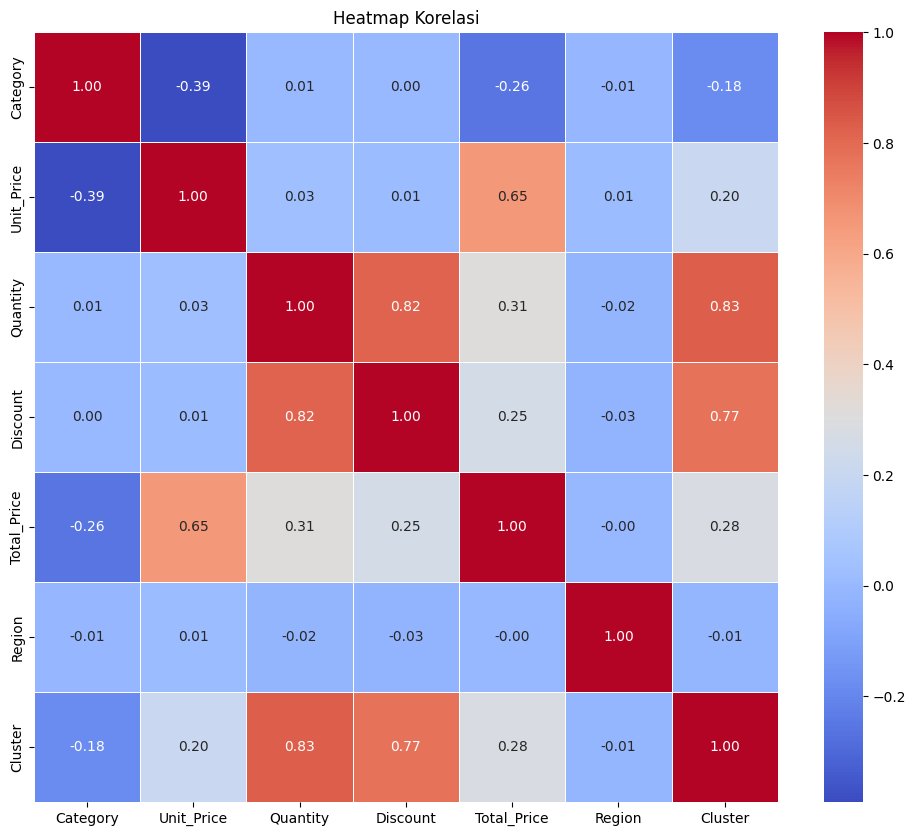

In [9]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
# Pisahkan fitur (X) dan target (y)
X = df_copy.drop(columns=['Cluster'])
y = df_copy['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 6), y_train=(8000,)
Test set shape: X_test=(2000, 6), y_test=(2000,)


In [11]:
# Pastikan kolom 'cluster' tidak termasuk dalam fitur X
print("Fitur yang digunakan:", X.columns)

Fitur yang digunakan: Index(['Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price',
       'Region'],
      dtype='object')


In [12]:
# Cek distribusi kelas target
print(df_copy['Cluster'].value_counts())

Cluster
0    6416
2    2300
1    1284
Name: count, dtype: int64


In [13]:
# Cek proporsi data training dan testing
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (8000, 6), Testing data shape: (2000, 6)


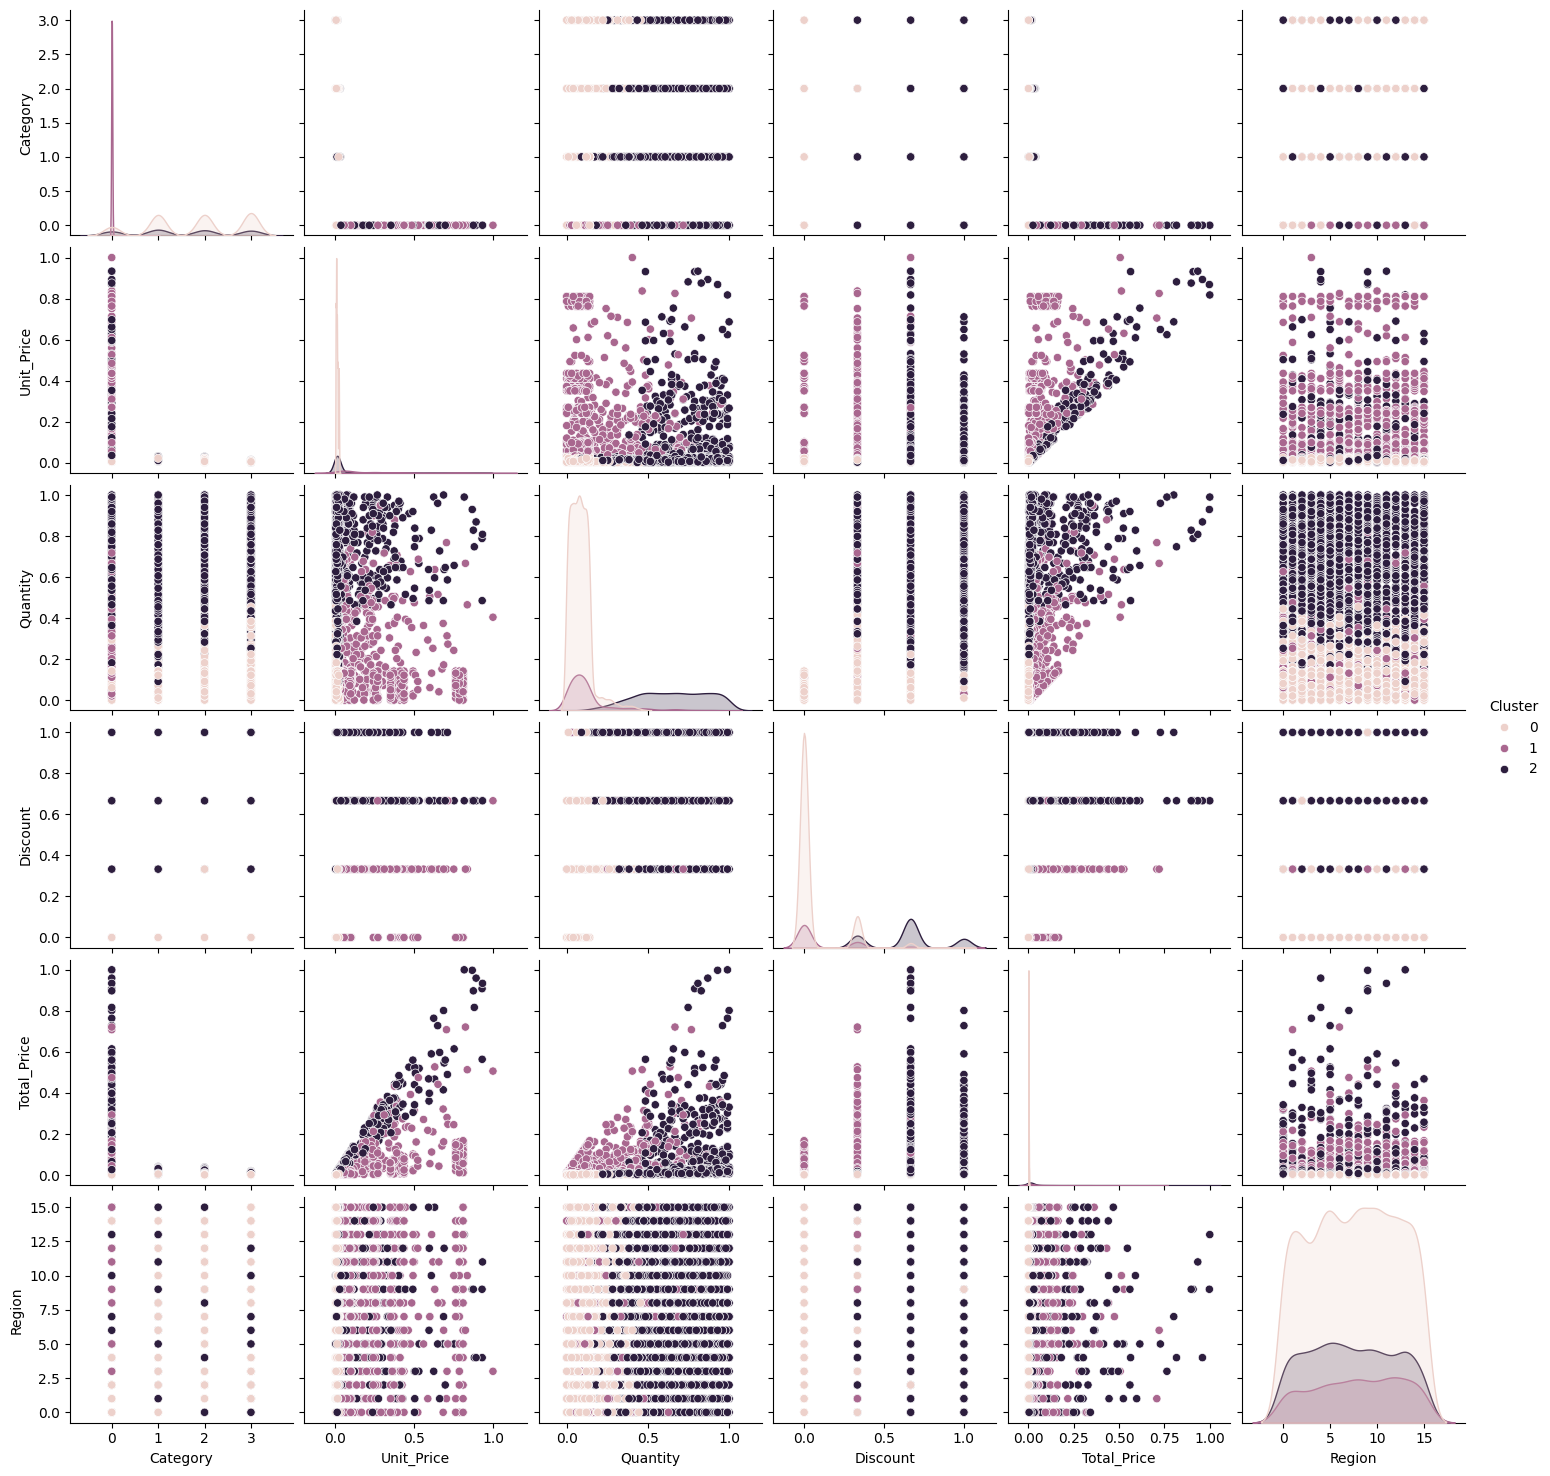

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi fitur berdasarkan cluster
sns.pairplot(df_copy, hue='Cluster')
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [15]:
# Model 1: SVM
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# model 3 : KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# from sklearn.metrics import accuracy_score

# Akurasi Training SVM
svm_train_pred = svm.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
print(f"Akurasi Training SVM: {svm_train_acc:.4f}")

# Akurasi Training Random Forest
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Akurasi Training Random Forest: {rf_train_acc:.4f}")

# Akurasi Training KNN
knn_train_pred = knn.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Akurasi Training KNN: {knn_train_acc:.4f}")


Akurasi Training SVM: 0.9544
Akurasi Training Random Forest: 1.0000
Akurasi Training KNN: 0.9748


In [17]:
# Pengecekan akurasi dengan cross validation

# Evaluasi svm dengan cross-validation
cv_scores_logreg = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (svm): {cv_scores_logreg.mean():.4f}")

# Evaluasi Random Forest dengan cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

# Evaluasi KNN dengan cross-validation
cv_scores_rf = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (KNN): {cv_scores_rf.mean():.4f}")

Cross-validation accuracy (svm): 0.9522
Cross-validation accuracy (Random Forest): 0.9948
Cross-validation accuracy (KNN): 0.9569


Saya mencoba menggunakan beberapa algoritma yaitu svm, knn, dan random forest. Hasil menunjukkan bahwa pada akurasi data training pada algoritma random forest terjadi overfitting. Oleh karena itu saya mengecek juga dengan cross validation score.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [18]:
# Prediksi menggunakan kedua model
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluasi Logistic Regression
print("svm Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Evaluasi Random Forest Classifier
print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluasi knn
print("\nknn Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

svm Regression Results:
Accuracy: 0.9425
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1289
           1       1.00      0.68      0.81       252
           2       0.94      0.96      0.95       459

    accuracy                           0.94      2000
   macro avg       0.96      0.88      0.91      2000
weighted avg       0.95      0.94      0.94      2000

Confusion Matrix:
[[1272    0   17]
 [  69  172   11]
 [  18    0  441]]

Random Forest Classifier Results:
Accuracy: 0.9945
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1289
           1       0.99      0.99      0.99       252
           2       0.98      1.00      0.99       459

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1282  

Dari uji yang telah dilaksanakan, didapatkan bahwa model terbaik adalah model random forest karena mencapai 99% accuracy

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Hyperparameter space untuk KNN
param_dist_knn = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 100),
    'p': [1, 2]
}

# Randomized Search untuk KNN
random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Training
random_search_knn.fit(X_train, y_train)

# Output hasil tuning
print("Best hyperparameters for KNN:", random_search_knn.best_params_)
print("Best score for KNN:", random_search_knn.best_score_)





Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 54, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best score for KNN: 0.968625


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [23]:
# Evaluasi pada test set KNN
best_knn_model = random_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)
print(f"Accuracy of best KNN model on test set: {accuracy_score(y_test, y_pred_best_knn):.4f}")

# Evaluasi knn
print("\nknn Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_knn))


Accuracy of best KNN model on test set: 0.9645

knn Classifier Results:
Accuracy: 0.9645
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1289
           1       0.96      0.91      0.93       252
           2       0.93      0.96      0.94       459

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
[[1261    5   23]
 [  13  229   10]
 [  15    5  439]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Saya di sini menggunakan 3 algoritma klasifikasi yaitu knn,svm, dan randomforest. Pada praktiknya ketiga algoritma bekerja dengan baik. Ketiganya menghasilkan accuracy di atas 90% baik di training maupun di testing.

2. Saya melakukan eksplorasi hyperparameter tuning kepada dua algoritma yaitu knn dan random forest. Ditemukan hasil bahwa knn berhasil memperbaiki accuracy nya dari 0.94 menjadi 0.96, peningkatan yang bisa dibilang cukup, sedangkan untuk random forest hanya ditemukan kenaikan yang sangat kecil.

3. Analisis Per Cluster
Mari kita lihat performa model untuk setiap cluster berdasarkan classification report:
  - Cluster 0
Precision: 0.98 , Recall: 0.98 , F1-Score: 0.98
Model sangat akurat dalam memprediksi cluster ini. Precision dan recall yang tinggi menunjukkan bahwa model berhasil menangkap hampir semua data dari cluster ini tanpa banyak prediksi positif palsu.
Kesimpulan : Performa model untuk cluster ini sangat optimal.
  - Cluster 1
Precision: 0.96 , Recall: 0.91 , F1-Score: 0.93
Model cukup baik dalam memprediksi cluster ini. Recall lebih rendah dibandingkan precision, yang berarti ada beberapa data dari cluster ini yang tidak terdeteksi oleh model.
Kesimpulan : Performa masih sangat baik, tetapi ada ruang kecil untuk meningkatkan recall agar model lebih sensitif terhadap cluster ini.
  - Cluster 2
Precision: 0.93 , Recall: 0.96 , F1-Score: 0.94
Recall lebih tinggi dibandingkan precision, yang berarti model cukup baik dalam menangkap data dari cluster ini tetapi juga membuat beberapa prediksi positif palsu.
Kesimpulan : Performa model untuk cluster ini sangat baik, tetapi precision dapat ditingkatkan untuk mengurangi prediksi positif palsu.

4. Observasi Umum
  - Cluster Dominan (Cluster 0) :
Cluster 0 memiliki jumlah data terbanyak (1289 dari total 2000). Performa model sangat baik di cluster ini, yang memberikan kontribusi besar terhadap akurasi keseluruhan.
  - Cluster Minoritas (Cluster 1 & 2) :
Meskipun jumlah datanya lebih sedikit, model tetap menunjukkan performa yang sangat baik di cluster-cluster ini. Namun, ada beberapa area yang perlu diperbaiki, seperti recall untuk cluster 1 dan precision untuk cluster 2.
  - Keseimbangan Performa :
F1-score untuk semua cluster berada di atas 0.93 , yang menunjukkan bahwa model secara umum seimbang dalam hal precision dan recall.

4. Saran Perbaikan
Meskipun performa model sudah sangat baik, berikut adalah beberapa saran untuk meningkatkan performa lebih lanjut:
  - Handle Imbalanced Data
Meskipun model bekerja dengan baik di cluster minoritas, recall untuk cluster 1 (0.91) masih bisa ditingkatkan. Pertimbangkan teknik seperti oversampling (misalnya SMOTE) atau undersampling untuk menyeimbangkan distribusi data.
  - Feature Engineering
Tambahkan fitur baru yang relevan dengan cluster-cluster tertentu, terutama cluster minoritas seperti cluster 1. Misalnya, jika ada informasi temporal (waktu), coba ekstrak fitur seperti hari dalam seminggu atau bulan.

5. Kesimpulan
Performa KNN Classifier setelah revisi sangat baik, dengan akurasi 96.45% dan F1-score yang seimbang di semua cluster. Model bekerja sangat baik di cluster dominan (Cluster 0) dan cukup baik di cluster minoritas. Namun, ada beberapa area yang masih bisa ditingkatkan, seperti recall untuk cluster 1 dan precision untuk cluster